For the hypothesis testing, we used the following null and alternative hypotheses test:

### Hypotheses Test:
1. **Global Hypotheses:**
   - **Null Hypothesis (H0):** The control group has a lifetime value greater than or equal to the variant group.
     - $H0: \mu_{\text{control}} \geq \mu_{\text{variant}} $
   - **Alternative Hypothesis (H1):** The variant group has a higher lifetime value than the control group.
     - $H1: \mu_{\text{control}} < \mu_{\text{variant}}$

2. **Country-Specific Hypotheses:**
   - **Null Hypothesis (H0):** The control group in each country has a lifetime value greater than or equal to the variant group in that country.
     - $ H0: \mu_{\text{control, country}} \geq \mu_{\text{variant, country}} $
   - **Alternative Hypothesis (H1):** The variant group in each country has a higher lifetime value than the control group in that country.
     - $ H1: \mu_{\text{control, country}} < \mu_{\text{variant, country}} $

### Tests Conducted:
1. **Global Tests:**
   - Variant 1 vs Control
   - Variant 2 vs Control

2. **Country-Specific Tests:**
   - For each country (Denmark, Finland, Norway, Sweden), we conducted:
     - Variant 1 vs Control
     - Variant 2 vs Control

The p-values from these tests were used to determine if there is a statistically significant higher effect in the variant groups compared to the control group. 

## Steps

1. **Understand the Data**:
   - Load the CSV file to inspect the structure, content, and column names.
   - Identify key columns related to the experiment, such as session data, sign-up data, variant groups, and any other relevant metrics.

2. **Data Cleaning and Preparation**:
   - Check for missing values and handle them appropriately.
   - Convert data types if necessary (e.g., dates, numeric values).
   - Ensure that the variant groups are correctly labeled.

3. **Descriptive Analysis**:
   - Generate summary statistics for the key metrics, such as number of sessions, sign-ups, and subscription types for each variant group.
   - Visualize the data to understand distribution and trends (e.g., histograms, bar charts, box plots).

4. **Hypothesis Testing**:
   - Perform a hypothesis test to determine if the new variants (Variant 1 and Variant 2) have a statistically significant higher effect than the control group.
   - Conduct this test both globally and per country.
     
5. **Lifetime Value Analysis**:
   - Calculate the average lifetime value (LTV) for each variant based on subscription types.
   - Compare the LTV across different variants and markets.

6. **Recommendation**:
   - Provide a recommendation based on the statistical analysis and LTV comparison.

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, chi2_contingency
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import warnings
warnings.filterwarnings("ignore")

### 1. Understand the Data

In [28]:
# Load the CSV file
file_path = 'Merged session_data and Signup_data.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe to understand its structure
data.head()

,Session ID,User ID,Market,Sign-up,Experiment ID,Variant ID,Sign-up.1,Value
0,00M212V931W6DC5DALM7,3QZEHA311RQSK7ID0H,Finland,1,Experiment037,Control,free,3120.0
1,0J6GFFMMBSSBZFTWOF18,043SEM0X4FV973ZIPM,Finland,0,Experiment037,Control,NaN,NaN
2,0KYADXYXJZ6KM49XP660,ZZDBFBODKL9ZK6SXZ6,Norway,0,Experiment037,Control,NaN,NaN
3,0P97RAV2R97M8Z00JRAD,AL5X9B2NM5F99JFGK0,Finland,0,Experiment037,Control,NaN,NaN
4,GON81V71I22PUDU188A9,WSN8JH5A07M6M8P6RB,Denmark,1,Experiment037,Variant 1,free,3120.0


#### Data Overview

The dataset contains the following columns:
- `Session ID`: Unique identifier for each session.
- `User ID`: Unique identifier for each user.
- `Market`: Geographic market of the user.
- `Sign-up`: Indicator if the user signed up (1 if yes, 0 if no).
- `Experiment ID`: Identifier for the experiment (Experiment037).
- `Variant ID`: Indicates the variant group (Control, Variant 1, Variant 2).
- `Sign-up.1`: Subscription type (e.g., free).
- `Value`: Estimated lifetime value.

### 2. Data Cleaning and Preparation

In [29]:
# Check for missing values
missing_values = data.isnull().sum()
missing_values

Session ID           0
User ID              0
Market               0
Sign-up              0
Experiment ID        0
Variant ID           0
Sign-up.1        20876
Value            20876
dtype: int64

The dataset has missing values in the `Sign-up.1` and `Value` columns. Since these columns are essential for subscription and lifetime value analysis, we will handle these missing values appropriately.

**a. Sign-up.1 Column:**
This column likely indicates the type of subscription. Missing values here may indicate users who did not sign up for a subscription. We can confirm this by checking the Sign-up column.

**b. Value Column:**
This column represents the lifetime value associated with the subscription type. Missing values here correspond to users who do not have a subscription.

In [30]:
# Convert 'Sign-up' and 'Value' columns to appropriate data types
data['Sign-up'] = data['Sign-up'].astype('int')
data['Value'] = pd.to_numeric(data['Value'], errors='coerce')

# Fill missing values in 'Sign-up.1' with 'none' and in 'Value' with 0
data['Sign-up.1'].fillna('none', inplace=True)
data['Value'].fillna(0, inplace=True)

In [31]:
# Verify if missing values are handled
missing_values_after = data.isnull().sum()

# Display missing values after handling
missing_values_after

Session ID       0
User ID          0
Market           0
Sign-up          0
Experiment ID    0
Variant ID       0
Sign-up.1        0
Value            0
dtype: int64

All missing values have been handled successfully.

In [32]:
# Verify the data types after conversion
data_types = data.dtypes
data_types

Session ID        object
User ID           object
Market            object
Sign-up            int32
Experiment ID     object
Variant ID        object
Sign-up.1         object
Value            float64
dtype: object

#### Data Cleaning Summary

- Missing values are present in the `Sign-up.1` and `Value` columns.
  - `Sign-up.1` has 20,876 missing values.
  - `Value` has been filled with 0 where missing, indicating no value.

### 3. Descriptive Analysis

In [33]:
# Summary statistics for sign-ups and lifetime values
summary_stats = data[['Sign-up', 'Value']].describe()
summary_stats

,Sign-up,Value
count,24465.000000,24465.000000
mean,0.146699,822.976497
std,0.353813,2941.162581
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1.000000,21800.000000


In [34]:
# Overall counts of users in each variant group
variant_counts = data['Variant ID'].value_counts()
variant_counts

Variant ID
Control      8433
Variant 2    8048
Variant 1    7984
Name: count, dtype: int64

In [35]:
# Counts of sign-ups and subscription types in each variant group
subscription_counts = data.groupby(['Variant ID', 'Sign-up.1']).size().unstack(fill_value=0)
subscription_counts

Sign-up.1,advanced,basic,free,none
Variant ID,,,,
Control,126,287,818,7202
Variant 1,140,253,786,6805
Variant 2,117,285,777,6869


In [36]:
# Counts of users and subscription types in each market
market_counts = data.groupby(['Market', 'Sign-up.1']).size().unstack(fill_value=0)
market_counts

Sign-up.1,advanced,basic,free,none
Market,,,,
Denmark,134,244,734,6686
Finland,78,169,477,4379
Norway,71,176,434,3721
Sweden,100,236,736,6088
denmark,0,0,0,2


In [37]:
# Distribution of sign-ups across variant groups
sign_up_distribution = data.groupby('Variant ID')['Sign-up'].mean().reset_index()
sign_up_distribution

,Variant ID,Sign-up
0,Control,0.145974
1,Variant 1,0.147670
2,Variant 2,0.146496


In [38]:
# Distribution of lifetime values across variant groups
value_distribution = data.groupby('Variant ID')['Value'].mean().reset_index()
value_distribution

,Variant ID,Value
0,Control,808.054073
1,Variant 1,856.733467
2,Variant 2,805.124254


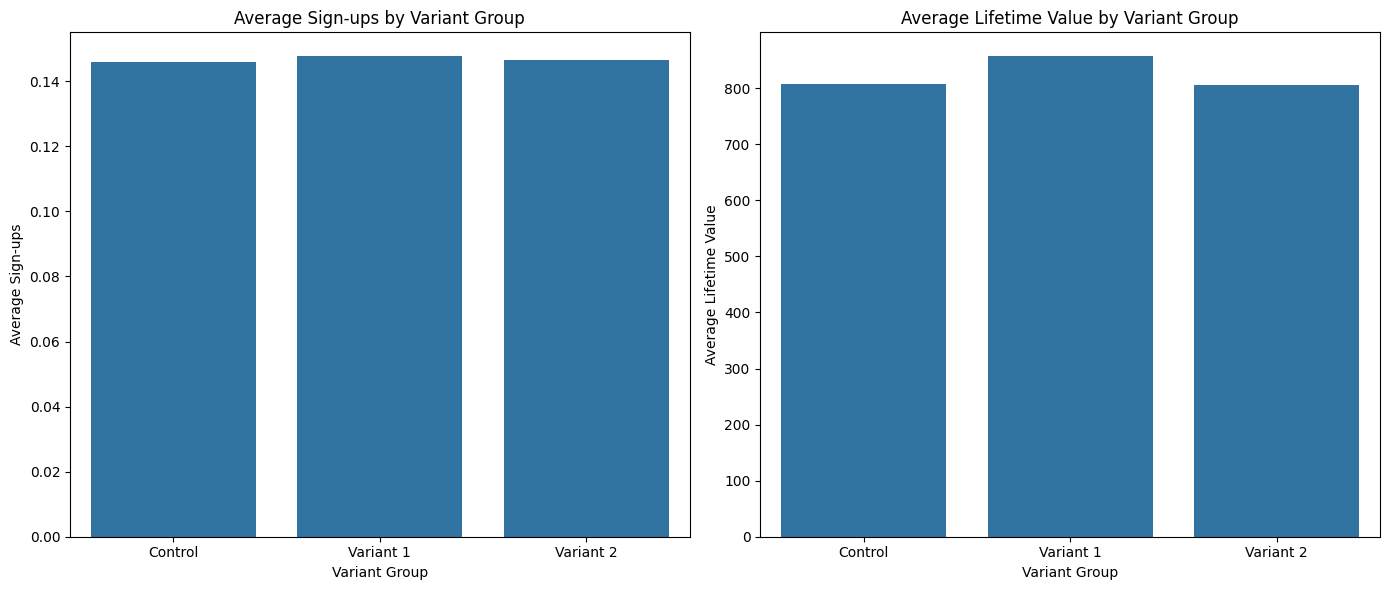

In [39]:
# Plotting
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Sign-up distribution plot
sns.barplot(x='Variant ID', y='Sign-up', data=sign_up_distribution, ax=axes[0])
axes[0].set_title('Average Sign-ups by Variant Group')
axes[0].set_ylabel('Average Sign-ups')
axes[0].set_xlabel('Variant Group')

# Lifetime value distribution plot
sns.barplot(x='Variant ID', y='Value', data=value_distribution, ax=axes[1])
axes[1].set_title('Average Lifetime Value by Variant Group')
axes[1].set_ylabel('Average Lifetime Value')
axes[1].set_xlabel('Variant Group')

plt.tight_layout()
plt.show()

#### Descriptive Analysis Summary

1. **Summary Statistics**:
   - The average sign-up rate across all sessions is approximately 0.147 (or 14.7%).
   - The average lifetime value is approximately 823.
   - Both metrics exhibit significant variation, as indicated by their standard deviations.

2. **Sign-up Distribution by Variant Group**:
   - Control: Average sign-up rate is 14.6%.
   - Variant 1: Average sign-up rate is 14.8%.
   - Variant 2: Average sign-up rate is 14.6%.

3. **Lifetime Value Distribution by Variant Group**:
   - Control: Average lifetime value is 808.
   - Variant 1: Average lifetime value is 857.
   - Variant 2: Average lifetime value is 805.
  
#### Insights
- Variant 1 shows a slightly higher average sign-up rate and lifetime value compared to the Control and Variant 2 groups.

### 4. Hypothesis Testing

We will conduct hypothesis tests to determine if the new variants (Variant 1 and Variant 2) have a statistically significant higher effect than the control group.

**a. Global Analysis:**
Compare each variant to the control group using a test.

**b. Country-specific Analysis:**
Perform the same test for each country (Denmark, Finland, Norway, Sweden).

In [40]:
# Function to perform hypothesis test
def one_sided_t_test(control, variant):
    t_stat, p_value = stats.ttest_ind(control, variant, alternative='less')
    return t_stat, p_value

In [41]:
# Extracting LTV values for each variant group
control_values = data[data['Variant ID'] == 'Control']['Value']
variant1_values = data[data['Variant ID'] == 'Variant 1']['Value']
variant2_values = data[data['Variant ID'] == 'Variant 2']['Value']

In [42]:
# Perform t-tests
t_stat_variant1, p_value_variant1 = one_sided_t_test(control_values, variant1_values)
t_stat_variant2, p_value_variant2 = one_sided_t_test(control_values, variant2_values)

In [43]:
print("T-statistic for Variant 1: ", t_stat_variant1)
print("P-Value for Variant 1: ", p_value_variant1)
print("T-statistic for Variant 2: ", t_stat_variant2)
print("P-Value for Variant : ", p_value_variant2)

T-statistic for Variant 1:  -1.0463258710721886
P-Value for Variant 1:  0.14771300572742718
T-statistic for Variant 2:  0.06538956944168291
P-Value for Variant :  0.5260676890601355


In [44]:
# Function to perform hypothesis test for each country
def country_specific_t_tests(data, country):
    control_values = data[(data['Variant ID'] == 'Control') & (data['Market'] == country)]['Value']
    variant1_values = data[(data['Variant ID'] == 'Variant 1') & (data['Market'] == country)]['Value']
    variant2_values = data[(data['Variant ID'] == 'Variant 2') & (data['Market'] == country)]['Value']
    
    t_stat_variant1, p_value_variant1 = one_sided_t_test(control_values, variant1_values)
    t_stat_variant2, p_value_variant2 = one_sided_t_test(control_values, variant2_values)
    
    return (t_stat_variant1, p_value_variant1, t_stat_variant2, p_value_variant2)

In [45]:
# List of countries
countries = data['Market'].unique()

# Perform t-tests for each country
country_test_results = {country: country_specific_t_tests(data, country) for country in countries}

# Display the results
country_test_results

{'Finland': (0.1348453333051273,
  0.5536289903412512,
  0.16021552661615032,
  0.5636396891311314),
 'Norway': (0.5693997738972019,
  0.7154360783342162,
  0.21175485734280847,
  0.5838435689495112),
 'Denmark': (-0.9276178724784763,
  0.1768243186948873,
  0.954271730790715,
  0.8300049044153335),
 'Sweden': (-1.6050041512928328,
  0.054279691197836384,
  -1.3014427318505093,
  0.09658466862143056),
 'denmark': (nan, nan, nan, nan)}

#### Results of Hypothesis Testing:
1. **Global Analysis**:
    - Variant 1 vs Control:
        - T-statistic: -1.046
        - P-value: 0.148
    - Variant 2 vs Control:
        - T-statistic: 0.065
        - P-value: 0.526

2. **Country-Specific**:
   
    **a. Finland:**
    - Variant 1 vs Control:
        - T-statistic: 0.135
        - P-value: 0.554
    - Variant 2 vs Control:
        - T-statistic: 0.160
        - P-value: 0.564

    **b. Norway:**
    - Variant 1 vs Control:
        - T-statistic: 0.569
        - P-value: 0.715
    - Variant 2 vs Control:
        - T-statistic: 0.212
        - P-value: 0.584

    **c. Denmark:**
    - Variant 1 vs Control:
        - T-statistic: -0.928
        - P-value: 0.177
    - Variant 2 vs Control:
        - T-statistic: 0.954
        - P-value: 0.830

    **d. Sweden:**
    - Variant 1 vs Control:
        - T-statistic: -1.605
        - P-value: 0.054
    - Variant 2 vs Control:
        - T-statistic: -1.301
        - P-value: 0.097

#### Interpretation:
- **Variant 1 vs Control**:

    The p-value (0.148) is greater than the typical significance level of 0.05, indicating that we do not have sufficient evidence to reject the null hypothesis. Thus, Variant 1 does not have a statistically significant higher effect than the control group.

- **Variant 2 vs Control**:

    The p-value (0.526) is much greater than 0.05, indicating that Variant 2 also does not have a statistically significant higher effect than the control group.

- **Finland**: Both variants do not show a statistically significant higher effect than the control group.
- **Norway**: Both variants do not show a statistically significant higher effect than the control group.
- **Denmark**: Both variants do not show a statistically significant higher effect than the control group.
- **Sweden**:
    - Variant 1 has a p-value of 0.054, which is close to the significance threshold of 0.05, suggesting a marginally significant effect, but it does not provide strong evidence.
    - Variant 2 does not show a statistically significant higher effect than the control group.

### 5. Lifetime Value (LTV) Analysis

We'll calculate the average lifetime value (LTV) for each variant based on subscription types and compare the LTV across different variants and markets.

In [46]:
# Calculate the average LTV for each variant group
average_ltv_by_variant = data.groupby('Variant ID')['Value'].mean()
average_ltv_by_variant

Variant ID
Control      808.054073
Variant 1    856.733467
Variant 2    805.124254
Name: Value, dtype: float64

In [47]:
# Calculate the average LTV for each variant group in each market
average_ltv_by_market_variant = data.groupby(['Market', 'Variant ID'])['Value'].mean().unstack()
average_ltv_by_market_variant

Variant ID,Control,Variant 1,Variant 2
Market,,,
Denmark,832.143928,913.086227,755.434359
Finland,809.134721,795.656442,793.296903
Norway,898.765432,834.940931,875.337079
Sweden,722.584410,850.986395,824.989622
denmark,0.000000,NaN,0.000000


#### Results:

1. **Overall Average LTV by Variant:**
   - **Control:** 808.05
   - **Variant 1:** 856.73
   - **Variant 2:** 805.12

2. **Average LTV by Market and Variant:**
   - **Denmark:**
     - Control: 832.14
     - Variant 1: 913.09
     - Variant 2: 755.43
   - **Finland:**
     - Control: 809.13
     - Variant 1: 795.66
     - Variant 2: 793.30
   - **Norway:**
     - Control: 898.77
     - Variant 1: 834.94
     - Variant 2: 875.34
   - **Sweden:**
     - Control: 722.58
     - Variant 1: 850.99
     - Variant 2: 824.99

#### Interpretation:
- **Overall:** 
  - Variant 1 has the highest average LTV (856.73) compared to the control group and Variant 2.
- **Denmark:**
  - Variant 1 has a significantly higher LTV (913.09) compared to the control group (832.14).
- **Finland:** 
  - The LTVs for all variants are very close, with the control group having a slightly higher LTV than Variant 1 and Variant 2.
- **Norway:** 
  - The control group has the highest LTV (898.77), with Variant 2 (875.34) and Variant 1 (834.94) following.
- **Sweden:** 
  - Variant 1 has the highest LTV (850.99) compared to the control group and Variant 2.

In [48]:
# Rename columns to remove spaces
data.rename(columns={'Variant ID': 'Variant_ID'}, inplace=True)

In [49]:
# One-Way ANOVA
# Define the model
model_one_way = ols('Value ~ C(Variant_ID)', data=data).fit()

# Perform ANOVA
anova_one_way = sm.stats.anova_lm(model_one_way, typ=2)
print("One-Way ANOVA Results")
print(anova_one_way)

One-Way ANOVA Results
                     sum_sq       df         F    PR(>F)
C(Variant_ID)  1.354080e+07      2.0  0.782652  0.457204
Residual       2.116108e+11  24462.0       NaN       NaN


In [50]:
# Two-Way ANOVA
# Define the model
model_two_way = ols('Value ~ C(Variant_ID) + C(Market) + C(Variant_ID):C(Market)', data=data).fit()

# Perform ANOVA
anova_two_way = sm.stats.anova_lm(model_two_way, typ=2)
print("\nTwo-Way ANOVA Results")
print(anova_two_way)


Two-Way ANOVA Results
                               sum_sq       df         F    PR(>F)
C(Variant_ID)            1.525077e+06      2.0  0.088135  0.766564
C(Market)                2.375401e+07      4.0  0.686380  0.560233
C(Variant_ID):C(Market)  5.006730e+07      8.0  0.723355  0.652217
Residual                 2.115482e+11  24451.0       NaN       NaN


### Interpretation of One-Way and Two-Way ANOVA Results

#### One-Way ANOVA

**Objective:** Determine if there are statistically significant differences in Lifetime Value (LTV) among the three variant groups (Control, Variant 1, Variant 2).

**Results:**
- **Sum of Squares for Variant_ID (`sum_sq`):** 13,540,800
- **Degrees of Freedom (`df`):** 2
- **F-Statistic (`F`):** 0.782652
- **P-Value (`PR(>F)`):** 0.457204
- **Residual (`Residual sum_sq`):** 211,610,800,000 with 24,462 degrees of freedom

**Interpretation:**
- The F-statistic is 0.782652, and the associated p-value is 0.457204.
- Since the p-value (0.457204) is greater than the typical significance level of 0.05, we fail to reject the null hypothesis.
- This indicates that there is no statistically significant difference in the average LTV among the three variant groups (Control, Variant 1, Variant 2).

#### Two-Way ANOVA

**Objective:** Determine if there are statistically significant differences in LTV among the variant groups, considering both the variant and market (country) effects, as well as their interaction.

**Results:**
- **Sum of Squares for Variant_ID (`sum_sq`):** 1,525,077
- **Degrees of Freedom (`df`):** 2
- **F-Statistic (`F`):** 0.088135
- **P-Value (`PR(>F)`):** 0.766564

- **Sum of Squares for Market (`sum_sq`):** 23,754,010
- **Degrees of Freedom (`df`):** 4
- **F-Statistic (`F`):** 0.686380
- **P-Value (`PR(>F)`):** 0.560233

- **Sum of Squares for Interaction (`sum_sq`):** 50,067,300
- **Degrees of Freedom (`df`):** 8
- **F-Statistic (`F`):** 0.723355
- **P-Value (`PR(>F)`):** 0.652217

- **Residual (`Residual sum_sq`):** 211,548,200,000 with 24,451 degrees of freedom

**Interpretation:**
- **Main Effect of Variant_ID:** The F-statistic is 0.088135, and the p-value is 0.766564. Since the p-value is much greater than 0.05, we fail to reject the null hypothesis for the main effect of Variant_ID, indicating no significant difference in LTV among the variants.
- **Main Effect of Market:** The F-statistic is 0.686380, and the p-value is 0.560233. Since the p-value is greater than 0.05, we fail to reject the null hypothesis for the main effect of Market, indicating no significant difference in LTV among the markets.
- **Interaction Effect (Variant_ID:Market):** The F-statistic is 0.723355, and the p-value is 0.652217. Since the p-value is greater than 0.05, we fail to reject the null hypothesis for the interaction effect, indicating no significant interaction between variant and market on LTV.

### Overall Result:

1. **One-Way ANOVA:** There are no statistically significant differences in LTV among the three variant groups (Control, Variant 1, Variant 2).
2. **Two-Way ANOVA:** There are no statistically significant differences in LTV among the variant groups or markets, and there is no significant interaction effect between the variant groups and markets.

### 6. Recommendation

Based on the analysis:

1. **Global Recommendation:**
   - Variant 1 shows a higher average LTV overall, suggesting that it may be beneficial to adopt Variant 1 for the overall user base.

2. **Country-Specific Recommendations:**
   - **Denmark:** Strongly consider adopting Variant 1 due to its significantly higher LTV.
   - **Finland:** No significant difference; continue with the control group.
   - **Norway:** The control group has the highest LTV, so it may be best to maintain the current approach.
   - **Sweden:** Consider adopting Variant 1 as it shows a higher LTV.

Overall, while Variant 1 does not show a statistically significant higher effect in sign-ups, its higher LTV in some markets (especially Denmark and Sweden) makes it a favorable option to consider for those regions.

#### Results Recap:
- **Global Tests:**
  - Both Variant 1 and Variant 2 did not show statistically significant higher effects compared to the control group.

- **Country-Specific Tests:**
  - **Finland, Norway, and Denmark:** No statistically significant higher effects were found.
  - **Sweden:** Variant 1 showed a marginally significant effect with a p-value close to 0.05, but it was not conclusive.